In [5]:
#importing libraries


import pandas as pd 
import re 
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#reading data 

df = pd.read_excel('/home/vaani/Downloads/flipkart_com-ecommerce_sample.xlsx')
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [7]:
#getting info from data

df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [8]:
#drop uniq_id, crawl_timestamp, pid, is_FK_Advantage_product since they're not significant in determining product_category
#drop image, product_url, product_specfications beause post cleaning they'll basically give the product_name or product_category or description
#drop product_rating, overall_rating for lack of data

df = df.drop(['uniq_id','crawl_timestamp', 'pid', 'product_url', 'image', 'is_FK_Advantage_product', 'product_rating', 'overall_rating', 'product_specifications'], axis = 1)
df.head()

,product_name,product_category_tree,retail_price,discounted_price,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,Sicons


In [9]:
#figuring out primary category

df['main_category']=df['product_category_tree'].apply(lambda x :x.split('>>')[0][2:len(x.split('>>')[0])-1])
df.head()

,product_name,product_category_tree,retail_price,discounted_price,description,brand,main_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies


In [10]:
#defining function to separate categories

def second_category(value):
    try:
        return value.split('>>')[1][1:len(value.split('>>')[1])-1]
    except IndexError:
        return 'None'       
def third_category(value):
    try:
        return value.split('>>')[2][1:len(value.split('>>')[2])-1]
    except IndexError:
        return 'None'
def fourth_category(value):
    try:
        return value.split('>>')[3][1:len(value.split('>>')[3])-1]
    except IndexError:
        return 'None'
def fifth_category(value):
    try:
        return value.split('>>')[4][1:len(value.split('>>')[4])-1]
    except IndexError:
        return 'None'
def sixth_category(value):
    try:
        return value.split('>>')[5][1:len(value.split('>>')[5])-1]
    except IndexError:
        return 'None'

In [11]:
#separating categories

df['second_category']=df['product_category_tree'].apply(second_category)
df['third_category']=df['product_category_tree'].apply(third_category)
df['fourth_category']=df['product_category_tree'].apply(fourth_category)
df['fifth_category']=df['product_category_tree'].apply(fifth_category)
df['sixth_category']=df['product_category_tree'].apply(sixth_category)
df.head()

,product_name,product_category_tree,retail_price,discounted_price,description,brand,main_category,second_category,third_category,fourth_category,fifth_category,sixth_category
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",999.0,379.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts"""
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",32157.0,22646.0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,None,None
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",999.0,499.0,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear,Women's Footwear,Ballerinas,"AW Bellies""",None,None
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",699.0,267.0,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts"""
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",220.0,210.0,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,"Sicons All Purpose Arnica Dog Shampoo (500 ml)""",None


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

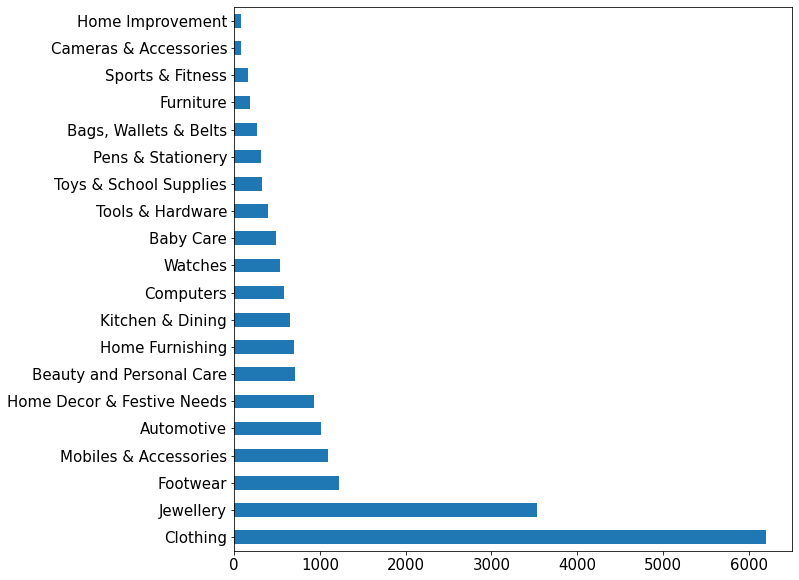

In [12]:
#visualising count of each main category

plt.figure(figsize=(10,10))
df['main_category'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [13]:
#discount percentage

df['discounted_percentage']=round((df['retail_price']-df['discounted_price'])/df['retail_price']*100,1)

In [14]:
#drop product_name, product_category_tree, retail_price, discounted_price

df = df.drop(['product_name', 'product_category_tree', 'retail_price', 'discounted_price'], axis = 1)
df.head()

,description,brand,main_category,second_category,third_category,fourth_category,fifth_category,sixth_category,discounted_percentage
0,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""",62.1
1,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Furniture,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,None,None,29.6
2,Key Features of AW Bellies Sandals Wedges Heel...,AW,Footwear,Women's Footwear,Ballerinas,"AW Bellies""",None,None,50.1
3,Key Features of Alisha Solid Women's Cycling S...,Alisha,Clothing,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""",61.8
4,Specifications of Sicons All Purpose Arnica Do...,Sicons,Pet Supplies,Grooming,Skin & Coat Care,Shampoo,"Sicons All Purpose Arnica Dog Shampoo (500 ml)""",None,4.5


In [15]:
#re-arranging dataframe to make 0th column main_category

df = df[['main_category', 'description', 'brand', 'second_category', 'third_category', 'fourth_category', 'fifth_category', 'sixth_category', 'discounted_percentage']]
df.head()

,main_category,description,brand,second_category,third_category,fourth_category,fifth_category,sixth_category,discounted_percentage
0,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""",62.1
1,Furniture,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,None,None,29.6
2,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,AW,Women's Footwear,Ballerinas,"AW Bellies""",None,None,50.1
3,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""",61.8
4,Pet Supplies,Specifications of Sicons All Purpose Arnica Do...,Sicons,Grooming,Skin & Coat Care,Shampoo,"Sicons All Purpose Arnica Dog Shampoo (500 ml)""",None,4.5


In [16]:
#importing NLP packages

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 

import string
exclude = set(string.punctuation)

In [17]:
#text data preprocessiong function

def filter_keywords(doc):
    doc=doc.lower()
    stop_free = " ".join([i for i in doc.split() if i not in stop_words])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    word_tokens = word_tokenize(punc_free)
    filtered_sentence = [(lem.lemmatize(w, "v")) for w in word_tokens]
    return filtered_sentence

In [18]:
#filtering keywords

df['description'] = df['description'].astype("str").apply(filter_keywords)
df['brand'] = df['brand'].astype("str").apply(filter_keywords)

df['second_category'] = df['second_category'].apply(filter_keywords)
df['third_category'] = df['third_category'].apply(filter_keywords)
df['fourth_category'] = df['fourth_category'].apply(filter_keywords)
df['fifth_category'] = df['fifth_category'].apply(filter_keywords)
df['sixth_category'] = df['sixth_category'].apply(filter_keywords)

In [23]:
#encoding main_category

category_list = list(df['main_category'].unique())
le = preprocessing.LabelEncoder()
category_encoded=le.fit_transform(df['main_category'])
df['main_category'] = category_encoded

In [46]:
#creating coloumn meta with relevant data for predicting main categrory

df["meta"]=df['description']+df['brand']+ df['second_category']+ df['third_category'] + df['fourth_category']
df["meta"] = df["meta"].apply(lambda x: ' '.join(x))

df.head()

,main_category,description,brand,second_category,third_category,fourth_category,fifth_category,sixth_category,discounted_percentage,meta
0,43,"[key, feature, alisha, solid, womens, cycle, s...",[alisha],"[womens, clothe]","[lingerie, sleep, swimwear]",[short],"[alisha, short]","[alisha, solid, womens, cycle, short]",62.1,key feature alisha solid womens cycle short co...
1,76,"[fabhomedecor, fabric, double, sofa, bed, fini...",[fabhomedecor],"[live, room, furniture]","[sofa, bed, futons]","[fabhomedecor, fabric, double, sofa, bed, fini...",[none],[none],29.6,fabhomedecor fabric double sofa bed finish col...
2,74,"[key, feature, aw, belly, sandals, wedge, heel...",[aw],"[womens, footwear]",[ballerinas],"[aw, belly]",[none],[none],50.1,key feature aw belly sandals wedge heel casual...
3,43,"[key, feature, alisha, solid, womens, cycle, s...",[alisha],"[womens, clothe]","[lingerie, sleep, swimwear]",[short],"[alisha, short]","[alisha, solid, womens, cycle, short]",61.8,key feature alisha solid womens cycle short co...
4,152,"[specifications, sicons, purpose, arnica, dog,...",[sicons],[groom],"[skin, coat, care]",[shampoo],"[sicons, purpose, arnica, dog, shampoo, 500, ml]",[none],4.5,specifications sicons purpose arnica dog shamp...


In [47]:
#re-arranging dataframe to make 1st column meta

df = df[['main_category', 'meta', 'description', 'brand', 'second_category', 'third_category', 'fourth_category', 'fifth_category', 'sixth_category', 'discounted_percentage']]
df.head()

,main_category,meta,description,brand,second_category,third_category,fourth_category,fifth_category,sixth_category,discounted_percentage
0,43,key feature alisha solid womens cycle short co...,"[key, feature, alisha, solid, womens, cycle, s...",[alisha],"[womens, clothe]","[lingerie, sleep, swimwear]",[short],"[alisha, short]","[alisha, solid, womens, cycle, short]",62.1
1,76,fabhomedecor fabric double sofa bed finish col...,"[fabhomedecor, fabric, double, sofa, bed, fini...",[fabhomedecor],"[live, room, furniture]","[sofa, bed, futons]","[fabhomedecor, fabric, double, sofa, bed, fini...",[none],[none],29.6
2,74,key feature aw belly sandals wedge heel casual...,"[key, feature, aw, belly, sandals, wedge, heel...",[aw],"[womens, footwear]",[ballerinas],"[aw, belly]",[none],[none],50.1
3,43,key feature alisha solid womens cycle short co...,"[key, feature, alisha, solid, womens, cycle, s...",[alisha],"[womens, clothe]","[lingerie, sleep, swimwear]",[short],"[alisha, short]","[alisha, solid, womens, cycle, short]",61.8
4,152,specifications sicons purpose arnica dog shamp...,"[specifications, sicons, purpose, arnica, dog,...",[sicons],[groom],"[skin, coat, care]",[shampoo],"[sicons, purpose, arnica, dog, shampoo, 500, ml]",[none],4.5


In [53]:
#importing sklearn packages

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.metrics import classification_report

In [56]:
#split training and test data

X_train, X_test, y_train, y_test = train_test_split(df['meta'],df['main_category'],test_size=0.2)

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(X_train)

In [58]:
model=MultinomialNB()

model.fit(tfidf_matrix, y_train)

print(model.score(tfidf_matrix, y_train))

X_test_tfidf = tf.transform(X_test) 

print (model.score(X_test_tfidf, y_test))


0.9001875
0.88025


In [59]:
predicted_result=model.predict(X_test_tfidf)
print(classification_report(y_test,predicted_result))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.96      0.99      0.98       194
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          26       1.00      0.46      0.63        93
          27       1.00      0.23      0.38        60
          29       1.00      0.83      0.91       141
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          37       1.00      0.44      0.62        18
          42       0.00      0.00      0.00         1
          43       0.80      1.00      0.89      1231
          45       0.00      0.00      0.00         2
          47       0.00    

/home/vaani/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
